In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [139]:
import sklearn  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [13]:
df = pd.read_csv(r"housing.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [151]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [153]:
df.dropna(axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


In [155]:
df1=df.drop("ocean_proximity",axis=1)

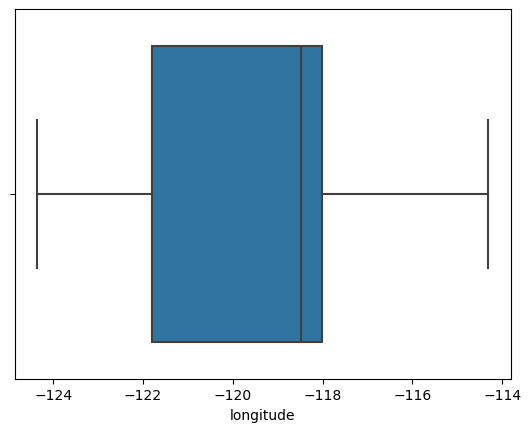

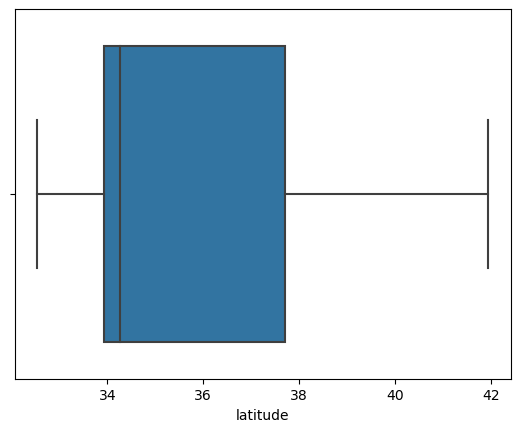

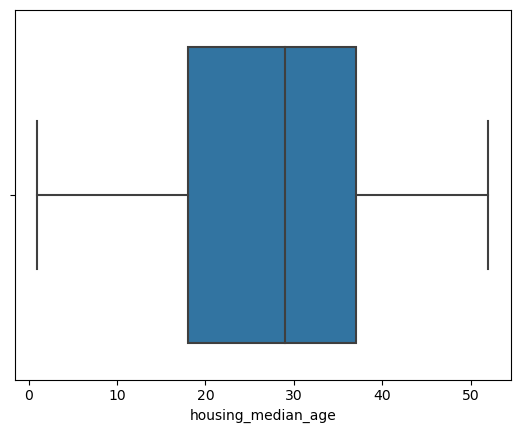

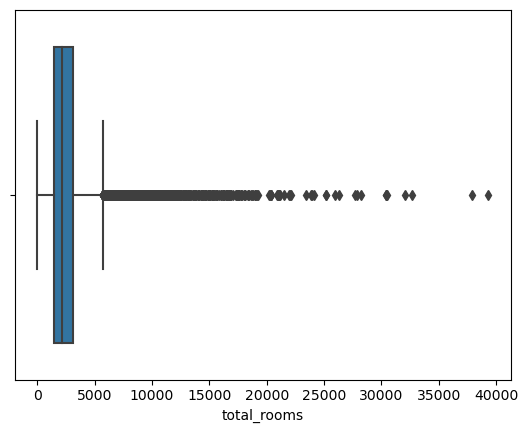

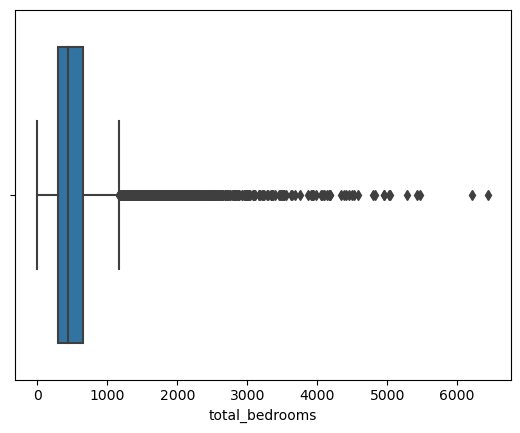

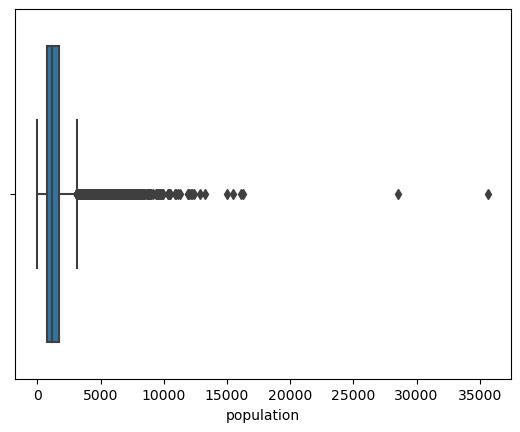

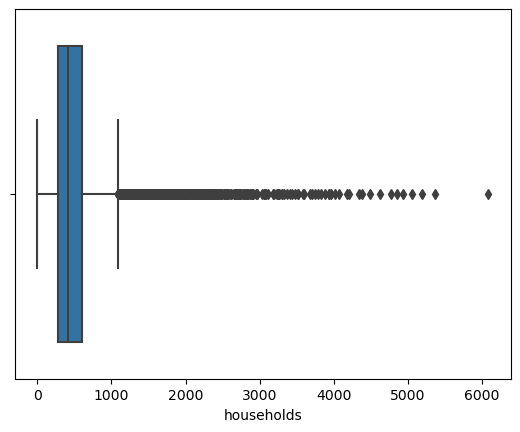

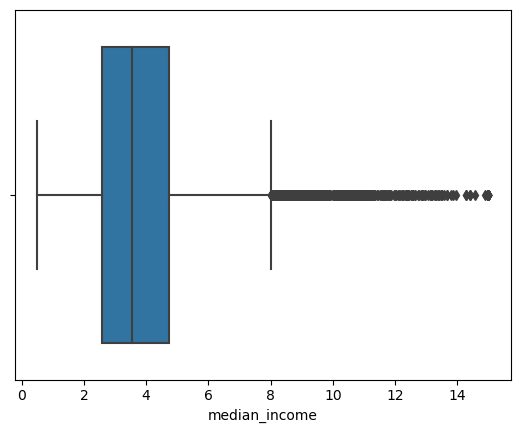

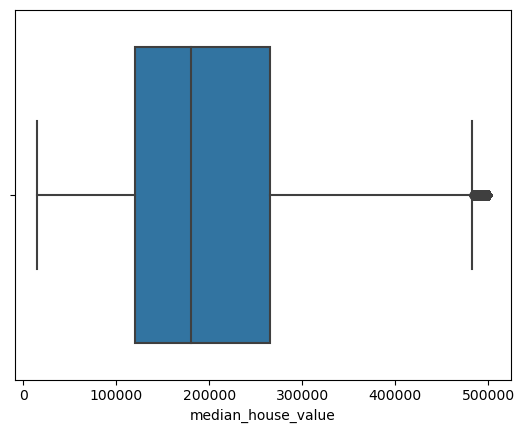

In [157]:
#BoxPlot to identify Outliers

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [237]:
mean_data=df1.mean()
print(mean_data) 

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64


Feature Scaling

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df1.columns)
print(scaled_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.970325   
1  -1.322844  1.043185           -0.607019     2.045890        1.348276   
2  -1.332827  1.038503            1.856182    -0.535746       -0.825561   
3  -1.337818  1.038503            1.856182    -0.624215       -0.718768   
4  -1.337818  1.038503            1.856182    -0.462404       -0.611974   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  


In [165]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [177]:
df1.fillna(df1.mean(), inplace=True)

In [179]:
train_pd, test_pd, val_pd=df1[:18000], df1[18000:19215], df1[19215:20640]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1215, 1425)

In [181]:
x_train, y_train= train_pd.to_numpy()[:, : -1] , train_pd.to_numpy()[:, -1]
x_val, y_val= val_pd.to_numpy()[:, : -1] , val_pd.to_numpy()[:, -1]
x_test, y_test= test_pd.to_numpy()[:, : -1] , test_pd.to_numpy()[:, -1]

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((18000, 8), (18000,), (1425, 8), (1425,), (1215, 8), (1215,))

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Implement regression algorithms

In [185]:
models = {"Linear Regression": LinearRegression(),
           "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
           "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
           "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
           "Support Vector Regressor": SVR()
         }

Train and evaluate each algorithm

In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

Compare the results of all models

In [227]:
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R2: {metrics['R2']:.2f}")
    print()

Model Evaluation Results:
Linear Regression:
MSE: 4898653519.57
MAE: 52631.15
R2: 0.71

Decision Tree Regressor:
MSE: 7417498595.61
MAE: 60252.73
R2: 0.56

Random Forest Regressor:
MSE: 4492900582.08
MAE: 47679.03
R2: 0.73

Gradient Boosting Regressor:
MSE: 4442885193.66
MAE: 48351.37
R2: 0.74

Support Vector Regressor:
MSE: 22053335023.06
MAE: 116494.75
R2: -0.31



Identify the best-performing algorithm

In [233]:
best_model = max(results, key=lambda x: results[x]['R2'])

print(f"Best-Performing Model: {best_model}")
print(f"  MSE: {results[best_model]['MSE']:.2f}")
print(f"  MAE: {results[best_model]['MAE']:.2f}")
print(f"  R2: {results[best_model]['R2']:.2f}")
print()

Best-Performing Model: Gradient Boosting Regressor
  MSE: 4442885193.66
  MAE: 48351.37
  R2: 0.74



Identify the worst-performing algorithm

In [235]:
worst_model = min(results, key=lambda x: results[x]['R2'])

print(f"Worst-Performing Model: {worst_model}")
print(f"  MSE: {results[worst_model]['MSE']:.2f}")
print(f"  MAE: {results[worst_model]['MAE']:.2f}")
print(f"  R2: {results[worst_model]['R2']:.2f}")
print()

Worst-Performing Model: Support Vector Regressor
  MSE: 22053335023.06
  MAE: 116494.75
  R2: -0.31

